# Random Forest Project 



Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.
Lending club had a very interesting year in 2016, so let's check out some of their data and keep the context in mind. This data is from before they even went public.
We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from here or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.
Here are what the columns represent:
credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
installment: The monthly installments owed by the borrower if the loan is funded.
log.annual.inc: The natural log of the self-reported annual income of the borrower.
dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
fico: The FICO credit score of the borrower.
days.with.cr.line: The number of days the borrower has had a credit line.
revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [3]:
import pandas as pd
import numpy as np


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
loans = pd.read_csv('Downloads/loan_data.csv')

In [8]:
loans.tail(12)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9566,0,all_other,0.2164,551.08,11.002100,24.06,662,1800.000000,16441,49.8,9,0,0,1
9567,0,all_other,0.1311,101.24,10.968198,8.23,687,2790.041667,1514,13.8,5,0,0,0
9568,0,all_other,0.1979,37.06,10.645425,22.17,667,5916.000000,28854,59.8,6,0,1,0
9569,0,home_improvement,0.1426,823.34,12.429216,3.62,722,3239.958333,33575,83.9,5,0,0,1
9570,0,all_other,0.1671,113.63,10.645425,28.06,672,3210.041667,25759,63.8,5,0,0,1
9571,0,all_other,0.1568,161.01,11.225243,8.00,677,7230.000000,6909,29.2,4,0,1,1
9572,0,debt_consolidation,0.1565,69.98,10.110472,7.02,662,8190.041667,2999,39.5,6,0,0,1
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1


In [9]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [11]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [14]:
loans['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

<AxesSubplot:xlabel='fico', ylabel='Count'>

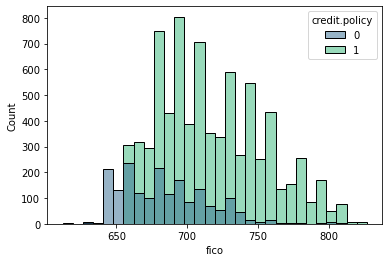

In [43]:
sns.histplot(data= loans,x='fico',hue = 'credit.policy',bins= 30,palette='viridis')

<AxesSubplot:xlabel='purpose', ylabel='count'>

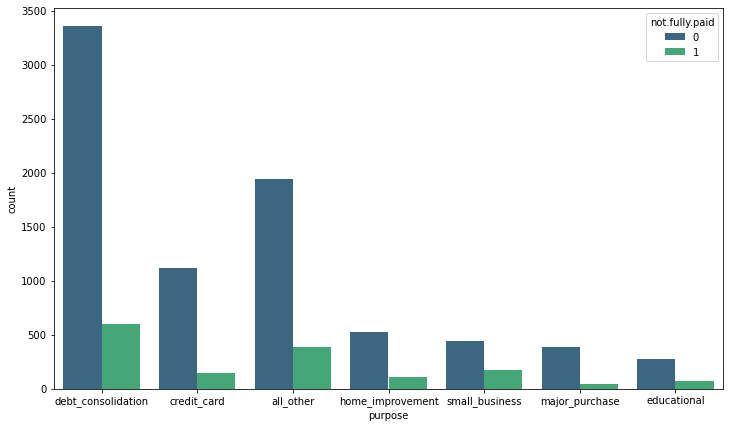

In [59]:

plt.figure(figsize =(12,7))
sns.countplot(data = loans,x= 'purpose',hue = 'not.fully.paid',palette='viridis')


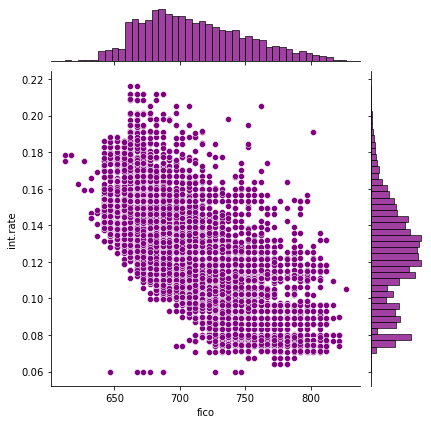

In [60]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

In [31]:
loans.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

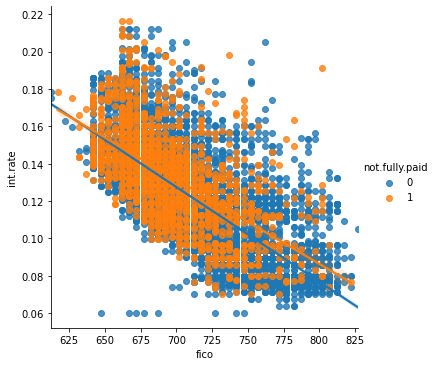

In [34]:
sns.lmplot(x='fico',y='int.rate',data=loans,hue='not.fully.paid')

In [61]:
cat_feats = ['purpose']

In [63]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [64]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
dtree = DecisionTreeClassifier()

In [74]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [75]:
pred = dtree.predict(X_test)

In [84]:
from sklearn.metrics import classification_report,confusion_matrix

In [87]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[2000  431]
 [ 343  100]]


              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [88]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rfc = RandomForestClassifier(n_estimators=200)

In [94]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [95]:
rfc_pred = rfc.predict(X_test)

In [96]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[2420   11]
 [ 429   14]]


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.56      0.03      0.06       443

    accuracy                           0.85      2874
   macro avg       0.70      0.51      0.49      2874
weighted avg       0.80      0.85      0.78      2874

